In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 


In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

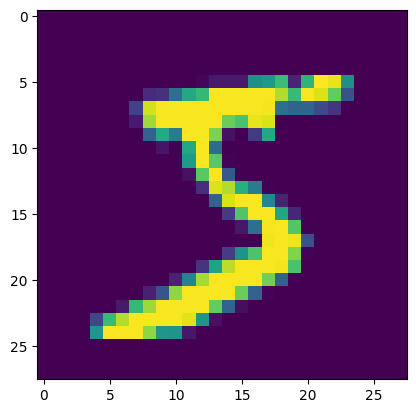

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [8]:
# Normalisation
x_train = x_train / 255
x_test = x_test / 255

In [9]:
model = Sequential()

In [10]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8594 - loss: 0.4943 - val_accuracy: 0.9614 - val_loss: 0.1425
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9608 - loss: 0.1304 - val_accuracy: 0.9664 - val_loss: 0.1124
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9748 - loss: 0.0850 - val_accuracy: 0.9684 - val_loss: 0.1176
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9816 - loss: 0.0592 - val_accuracy: 0.9722 - val_loss: 0.1007
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9849 - loss: 0.0461 - val_accuracy: 0.9728 - val_loss: 0.0992
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9895 - loss: 0.0337 - val_accuracy: 0.9725 - val_loss: 0.0996
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9907 - loss: 0.0282 - val_accuracy: 0.9732 - val_loss: 0.1041
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9920 - loss: 0.0244 - 

In [14]:
model.save(r'C:\Users\ACER\Desktop\ML_proff/Trained_model.h5')

In [15]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [16]:
# Convert the predicted probabilities (y_prob) into class labels
# argmax(axis=1) returns the index of the maximum probability for each sample, which corresponds to the predicted class label
y_pred = y_prob.argmax(axis=1)

In [17]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, y_pred)*100

97.77

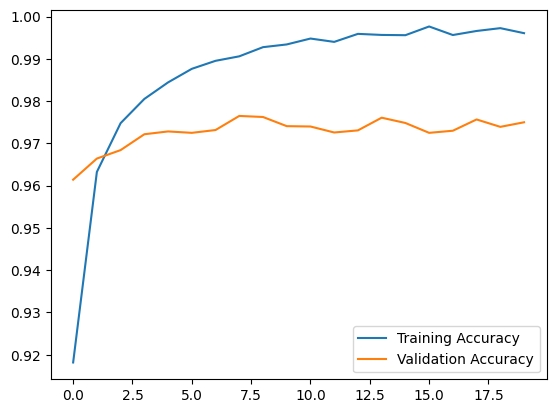

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

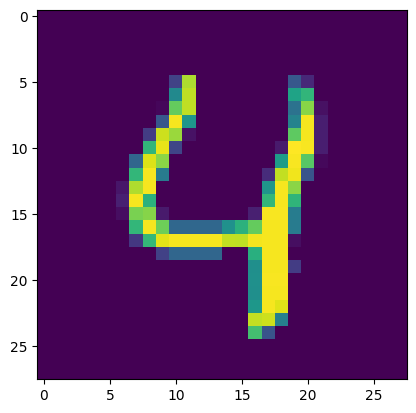

In [28]:
plt.imshow(x_test[4])

In [30]:
model.predict(x_test[4].reshape(1,28,28)).argmax(axis=1)
#If model.predict(...) outputs [0.1, 0.05, 0.05, 0.7, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0], 
#the result of .argmax(axis=1) will be [3], indicating that the model predicts the digit as 3.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([4])

In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [33]:
model = keras.models.load_model("Trained_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


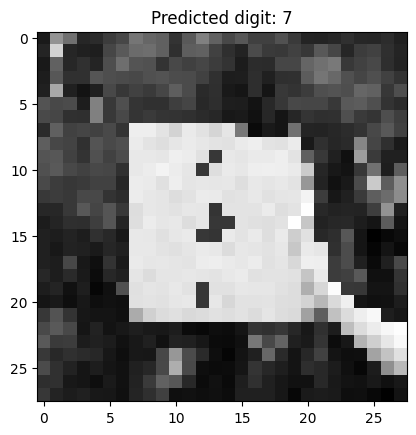

The predicted digit is: 7


In [35]:
img_path = r"C:\Users\ACER\Desktop\ML_proff\7.png"
img = image.load_img(img_path, target_size=(28,28), color_mode='grayscale')
img_array = image.img_to_array(img) / 255.0
y_prob1 = model.predict(img_array.reshape(1,28,28))
y_pred1 = y_prob.argmax(axis=1)

plt.imshow(img, cmap='gray')
plt.title(f'Predicted digit: {y_pred[0]}')  # Show the predicted digit in the title
plt.show()

print(f'The predicted digit is: {y_pred1[0]}')